In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv('diabetes.csv')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
print(data.shape)

(768, 9)


In [8]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [11]:
print(y_train.shape, y_test.shape)

(614,) (154,)


In [12]:

print("Tổng số quan sát: ", X_train.shape[0]+X_test.shape[0])

Tổng số quan sát:  768


In [13]:
print("Tổng số quan sát: ", y_train.shape[0]+y_test.shape[0])


Tổng số quan sát:  768


In [14]:
#loại bỏ khoảng trống không cần thiết

In [15]:
X_train=X_train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [16]:
X_test=X_test.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [17]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [18]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [19]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [20]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [21]:
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
data.isin(['?']).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
print((X_train==0).sum())

Pregnancies                  91
Glucose                       5
BloodPressure                24
SkinThickness               176
Insulin                     290
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [24]:
print("\nTổng số {}% của giá trị bị thiếu trong tập train".
      format(round(sum(X_test.isna().sum()/X_train.shape[0])*100,2)))


Tổng số 0.0% của giá trị bị thiếu trong tập train


In [25]:
#không có giá trị bị thiếu nhưng có quá nhiều giá trị bằng 0 ====>>> cân bằng lại
#Glucose                       5
#BloodPressure                24
#SkinThickness               176
#Insulin                     290
#BMI                          7
# tuy nhiên Pregnancies       91 là hoàn toàn hợp lý vì có thể mang thai hoặc không

In [26]:
print("\nTổng số {}% của giá trị bị thiếu trong tập test".
      format(round(sum(X_test.isna().sum()/X_test.shape[0])*100,2)))


Tổng số 0.0% của giá trị bị thiếu trong tập test


In [27]:
#tương tự với X_train

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")#thay thế bằng giá trị xuất hiện nhiều nhất

In [29]:
imputer.fit(X_train[['Glucose']])
imputer.fit(X_train[['BloodPressure']])
imputer.fit(X_train[['SkinThickness']])
imputer.fit(X_train[['Insulin']])
imputer.fit(X_train[['BMI']])


SimpleImputer(strategy='most_frequent')

In [30]:
X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = X_train[['Glucose', 
                    'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)



imputer.fit(X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# Sau đó, sử dụng transform để thay thế giá trị missing
X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.transform(X_train[['Glucose',
                            'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [31]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,70.0,30.0,105.0,32.0,0.304,21
618,9,112.0,82.0,24.0,105.0,28.2,1.282,50
346,1,139.0,46.0,19.0,83.0,28.7,0.654,22
294,0,161.0,50.0,30.0,105.0,21.9,0.254,65
231,6,134.0,80.0,37.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.0,35.0,140.0,28.6,0.411,26
106,1,96.0,122.0,30.0,105.0,22.4,0.207,27
270,10,101.0,86.0,37.0,105.0,45.6,1.136,38
435,0,141.0,70.0,30.0,105.0,42.4,0.205,29


In [32]:
imputer.fit(X_test[['Glucose']])
imputer.fit(X_test[['BloodPressure']])
imputer.fit(X_test[['SkinThickness']])
imputer.fit(X_test[['Insulin']])
imputer.fit(X_test[['BMI']])


SimpleImputer(strategy='most_frequent')

In [33]:
X_test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = X_test[['Glucose',
    'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)



imputer.fit(X_test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# Sau đó, sử dụng transform để thay thế giá trị missing
X_test[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.transform(X_test[['Glucose', 
                        'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [34]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98.0,58.0,33.0,190.0,34.0,0.430,43
324,2,112.0,75.0,32.0,49.0,35.7,0.148,21
624,2,108.0,64.0,32.0,49.0,30.8,0.158,21
690,8,107.0,80.0,32.0,49.0,24.6,0.856,34
473,7,136.0,90.0,32.0,49.0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165.0,88.0,32.0,49.0,30.4,0.302,49
534,1,77.0,56.0,30.0,56.0,33.3,1.251,24
344,8,95.0,72.0,32.0,49.0,36.8,0.485,57
296,2,146.0,70.0,38.0,360.0,28.0,0.337,29


In [35]:
print((X_test==0).sum())

Pregnancies                 20
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


In [36]:
print((X_train==0).sum())

Pregnancies                 91
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


In [37]:
#như vậy đã loại bỏ được các giá trị bằng 0 không có nghĩa trong X_train và X_test

<Axes: >

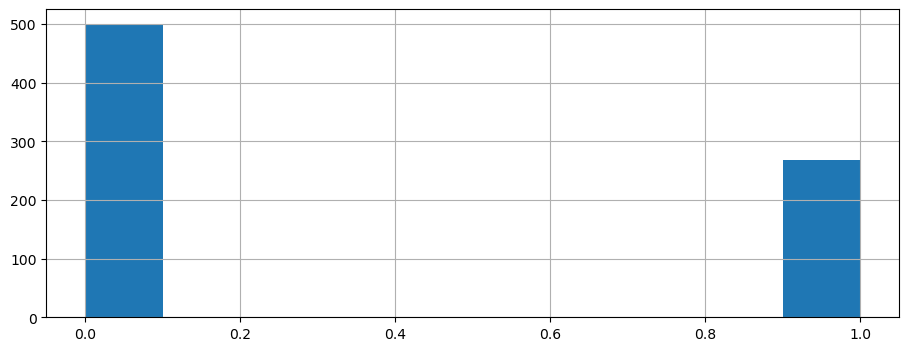

In [38]:
 rcParams['figure.figsize'] = 11, 4
 y.hist()

In [39]:
#Y_train
print('Tổng số quan sát : {}\n'.format(len(y_train)))

print('Số người mắc bệnh : {}%\n'.format(round(((y_train==1).sum()/len(y_train))*100, 2)))

print('Số người không mắc bệnh : {}%'.format(round(((y_train==0).sum()/len(y_train))*100, 2)))

Tổng số quan sát : 614

Số người mắc bệnh : 34.69%

Số người không mắc bệnh : 65.31%


In [40]:
#Y_test
print('Tổng số quan sát : {}\n'.format(len(y_test)))

print('Số người mắc bệnh : {}%\n'.format(round(((y_test==1).sum()/len(y_test))*100, 2)))

print('Số người không mắc bệnh : {}%'.format(round(((y_test==0).sum()/len(y_test))*100, 2)))

Tổng số quan sát : 154

Số người mắc bệnh : 35.71%

Số người không mắc bệnh : 64.29%


In [41]:
# Tỷ lệ của người mắc bệnh và không mắc bệnh ở y_train và y_test là mất cân bằng

In [42]:
pd.DataFrame(y.value_counts())

,count
Outcome,
0,500
1,268


In [43]:
# Đây là bài toán phân loại nhị phân với hai classes:

# 0: không mắc bệnh
# 1: mắc bệnh

In [44]:
# Trong đó có 500 negative cases và 268 postive cases. Bộ dữ liệu này bị mất cân bằng giữa các lớp. 

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)


In [46]:
X_resampled_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,84.000000,70.000000,30.000000,105.000000,32.000000,0.304000,21
1,9,112.000000,82.000000,24.000000,105.000000,28.200000,1.282000,50
2,1,139.000000,46.000000,19.000000,83.000000,28.700000,0.654000,22
3,0,161.000000,50.000000,30.000000,105.000000,21.900000,0.254000,65
4,6,134.000000,80.000000,37.000000,370.000000,46.200000,0.238000,46
...,...,...,...,...,...,...,...,...
797,7,113.860368,66.000000,30.000000,105.000000,32.790691,0.258326,42
798,9,148.556595,82.886811,45.031496,231.990649,38.583317,0.911017,48
799,8,124.718145,71.127419,27.127419,112.181452,31.917379,0.209228,40
800,0,141.472659,70.000000,30.000000,105.000000,42.612697,0.255220,29


In [47]:
pd.DataFrame(y_resampled_train.value_counts())

,count
Outcome,
0,401
1,401


In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_test, y_resampled_test = smote.fit_resample(X_test, y_test)


In [49]:
X_resampled_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,98.000000,58.000000,33.000000,190.000000,34.000000,0.430000,43
1,2,112.000000,75.000000,32.000000,49.000000,35.700000,0.148000,21
2,2,108.000000,64.000000,32.000000,49.000000,30.800000,0.158000,21
3,8,107.000000,80.000000,32.000000,49.000000,24.600000,0.856000,34
4,7,136.000000,90.000000,32.000000,49.000000,29.900000,0.210000,50
...,...,...,...,...,...,...,...,...
193,0,168.526562,78.000000,32.000000,49.000000,31.927901,0.779178,30
194,9,147.595728,84.291817,34.000000,167.224910,31.746191,0.816240,45
195,8,102.389873,71.324635,25.344206,49.000000,27.996738,0.499645,37
196,0,103.331845,71.349708,36.665922,82.708348,37.575524,0.382048,22


In [50]:
pd.DataFrame(y_resampled_test.value_counts())

,count
Outcome,
0,99
1,99


<Axes: >

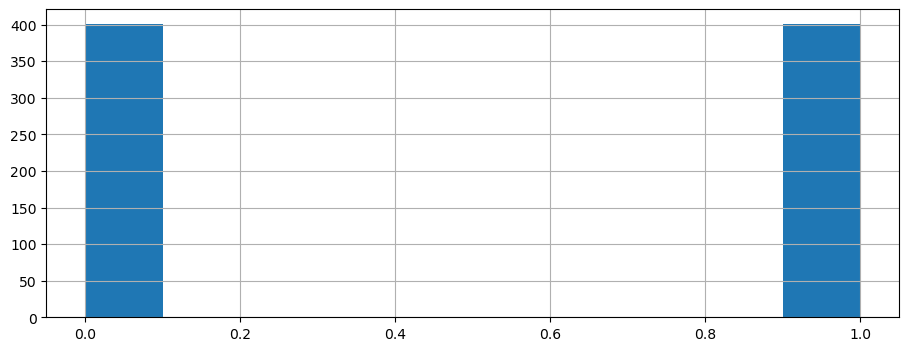

In [51]:
 rcParams['figure.figsize'] = 11, 4
 y_resampled_train.hist()

<Axes: >

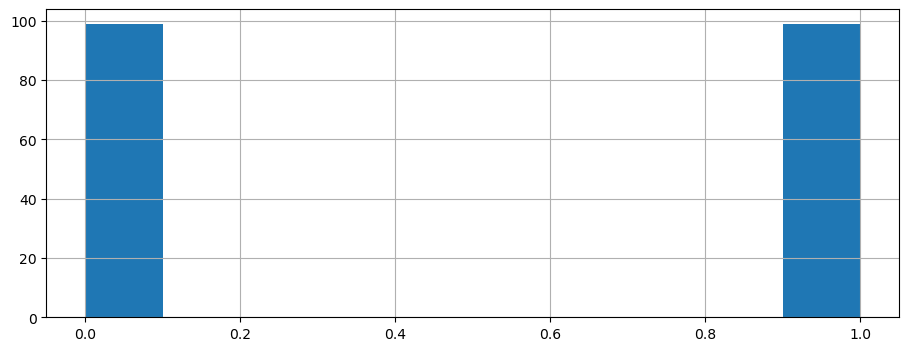

In [52]:
rcParams['figure.figsize'] = 11, 4
y_resampled_test.hist()

In [53]:
print('Tổng số quan sát : {}\n'.format(len(y_resampled_train)))

print('Số người mắc bệnh : {}%\n'.format(round(((y_resampled_train==1).sum()/len(y_resampled_train))*100, 2)))

print('Số người không mắc bệnh : {}%'.format(round(((y_resampled_train==0).sum()/len(y_resampled_train))*100, 2)))

Tổng số quan sát : 802

Số người mắc bệnh : 50.0%

Số người không mắc bệnh : 50.0%


In [54]:
print('Tổng số quan sát : {}\n'.format(len(y_resampled_test)))

print('Số người mắc bệnh : {}%\n'.format(round(((y_resampled_test==1).sum()/len(y_resampled_test))*100, 2)))

print('Số người không mắc bệnh : {}%'.format(round(((y_resampled_test==0).sum()/len(y_resampled_test))*100, 2)))

Tổng số quan sát : 198

Số người mắc bệnh : 50.0%

Số người không mắc bệnh : 50.0%


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>, <Axes: >]],
      dtype=object)

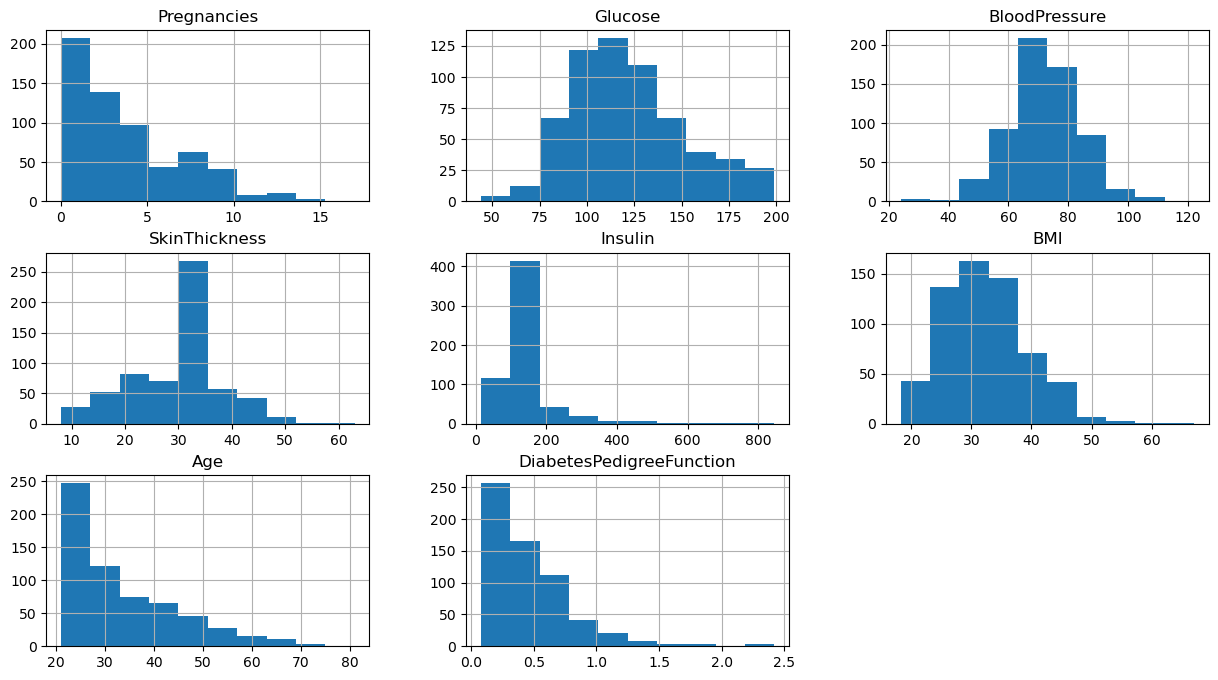

In [55]:
rcParams['figure.figsize'] = 15, 8
X_train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','DiabetesPedigreeFunction']].hist()

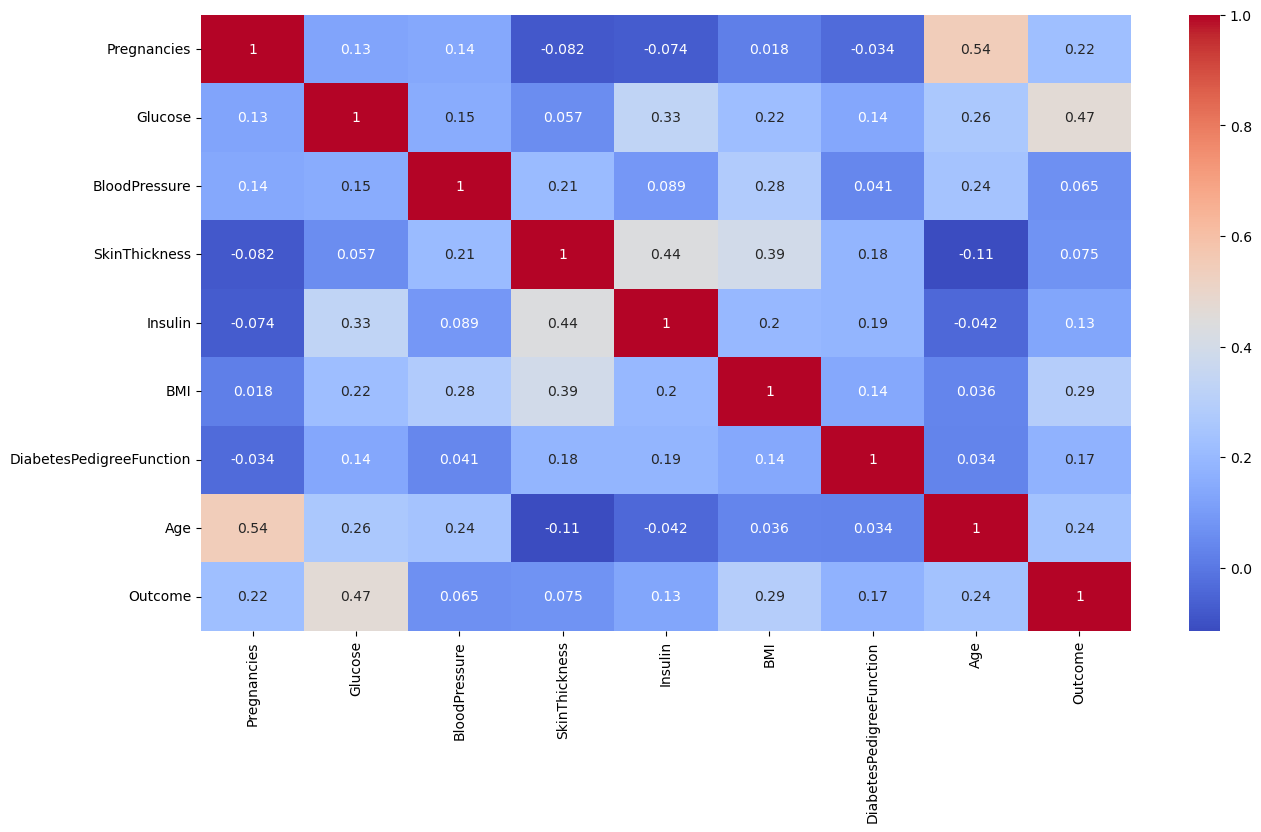

In [56]:
correlation_matrix = data.corr()

# Vẽ biểu đồ heatmap cho ma trận tương quan
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Pregnancies', ylabel='Density'>

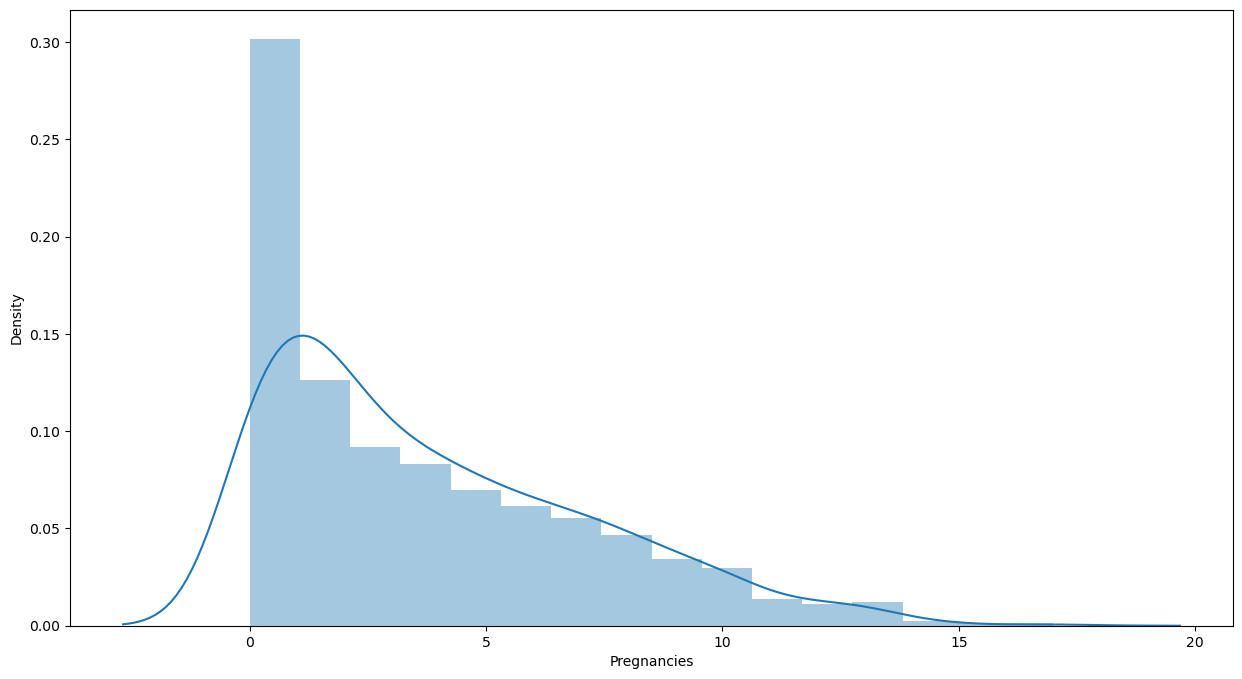

In [57]:
sns.distplot(X['Pregnancies'])

<Axes: xlabel='Glucose', ylabel='Density'>

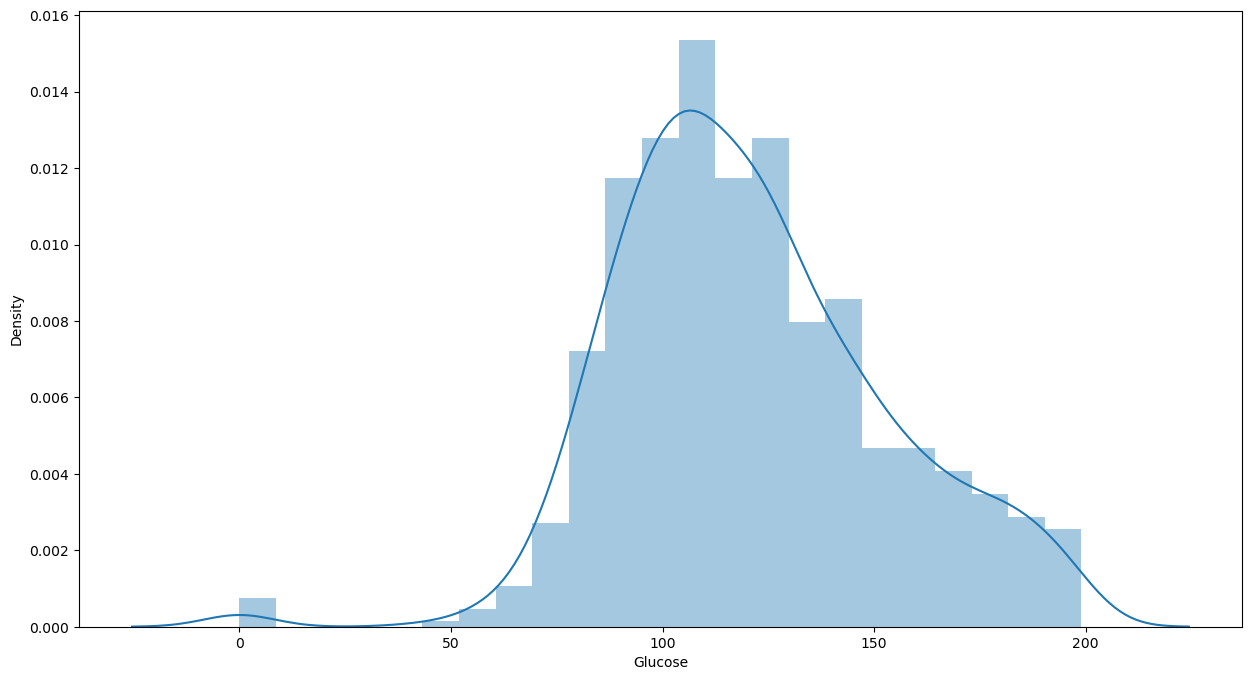

In [58]:
sns.distplot( X['Glucose'])

<Axes: xlabel='BloodPressure', ylabel='Density'>

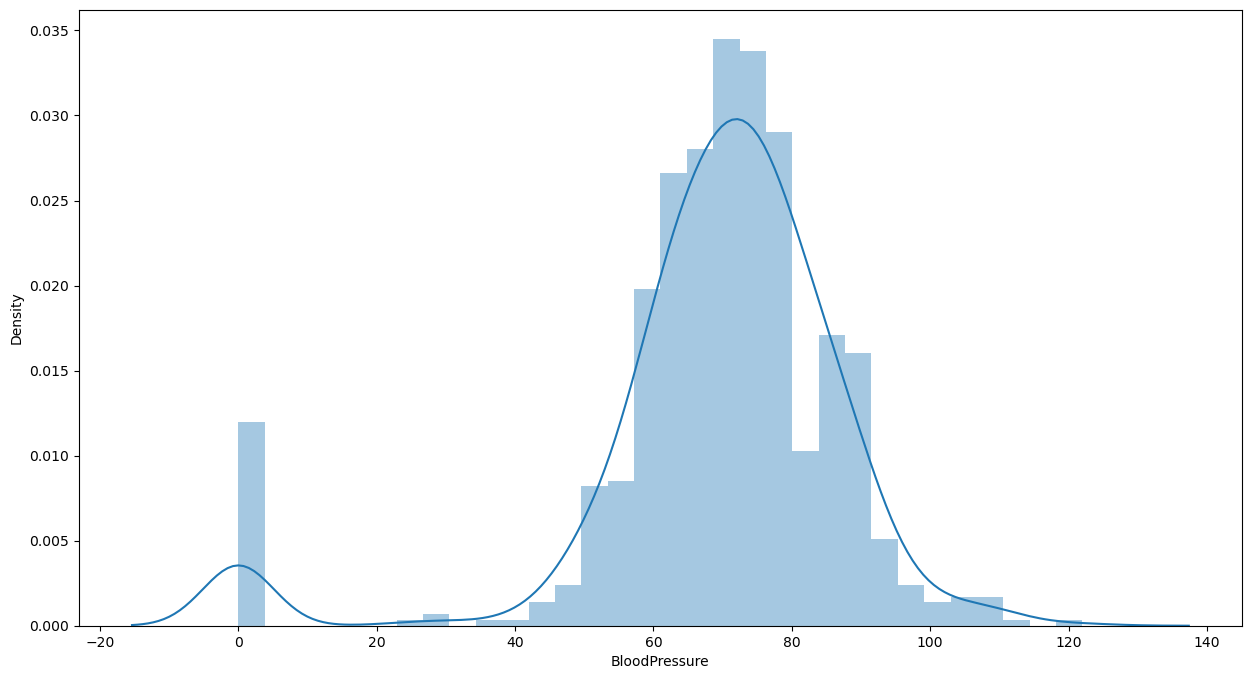

In [59]:
sns.distplot(X['BloodPressure'])

<Axes: xlabel='SkinThickness', ylabel='Density'>

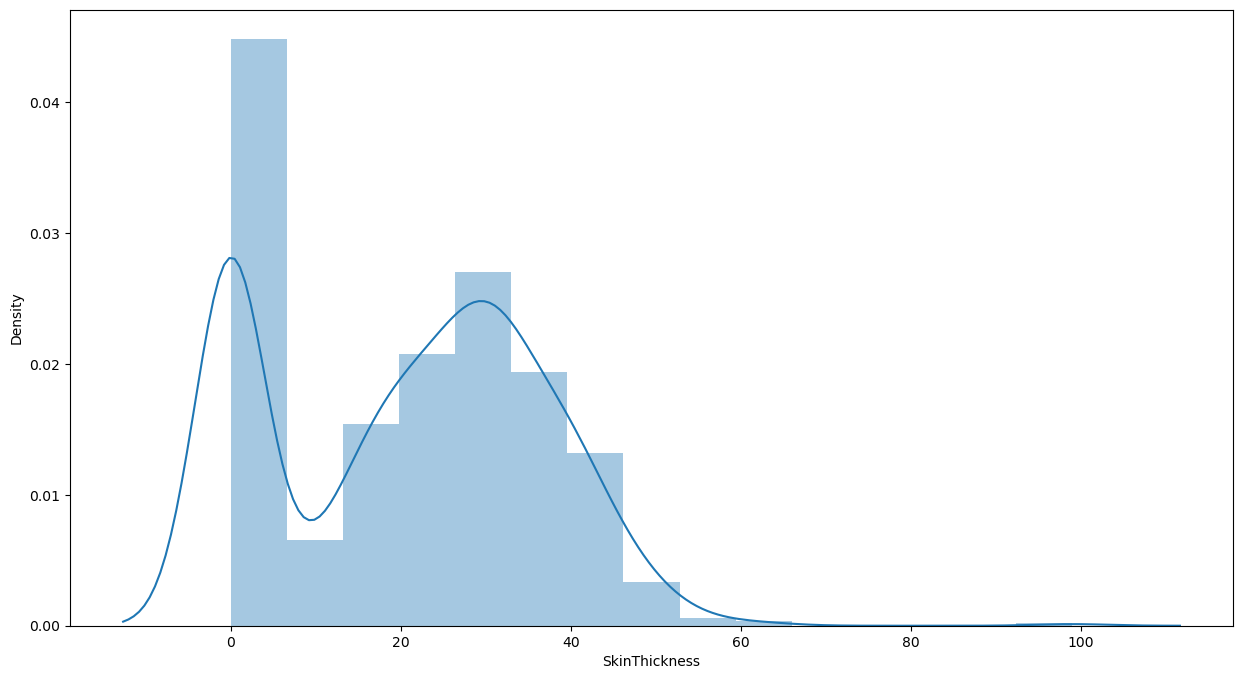

In [60]:
sns.distplot(X['SkinThickness'])

<Axes: xlabel='Insulin', ylabel='Density'>

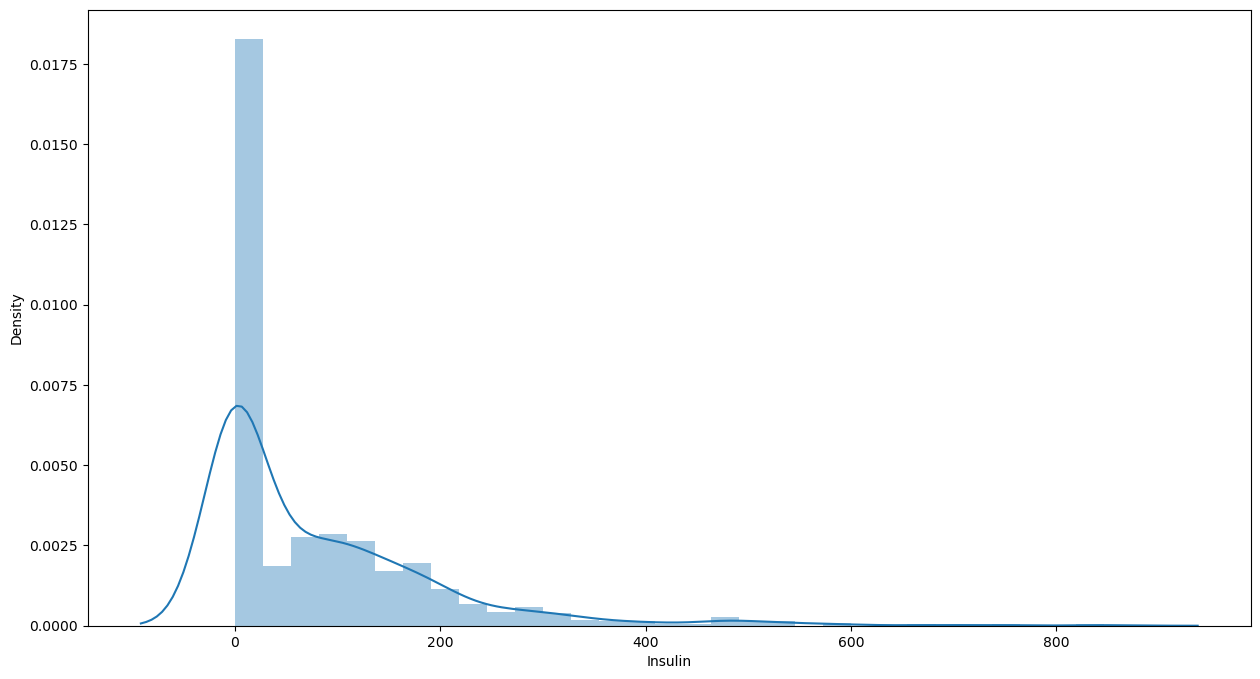

In [61]:
sns.distplot(X['Insulin'])

<Axes: xlabel='BMI', ylabel='Density'>

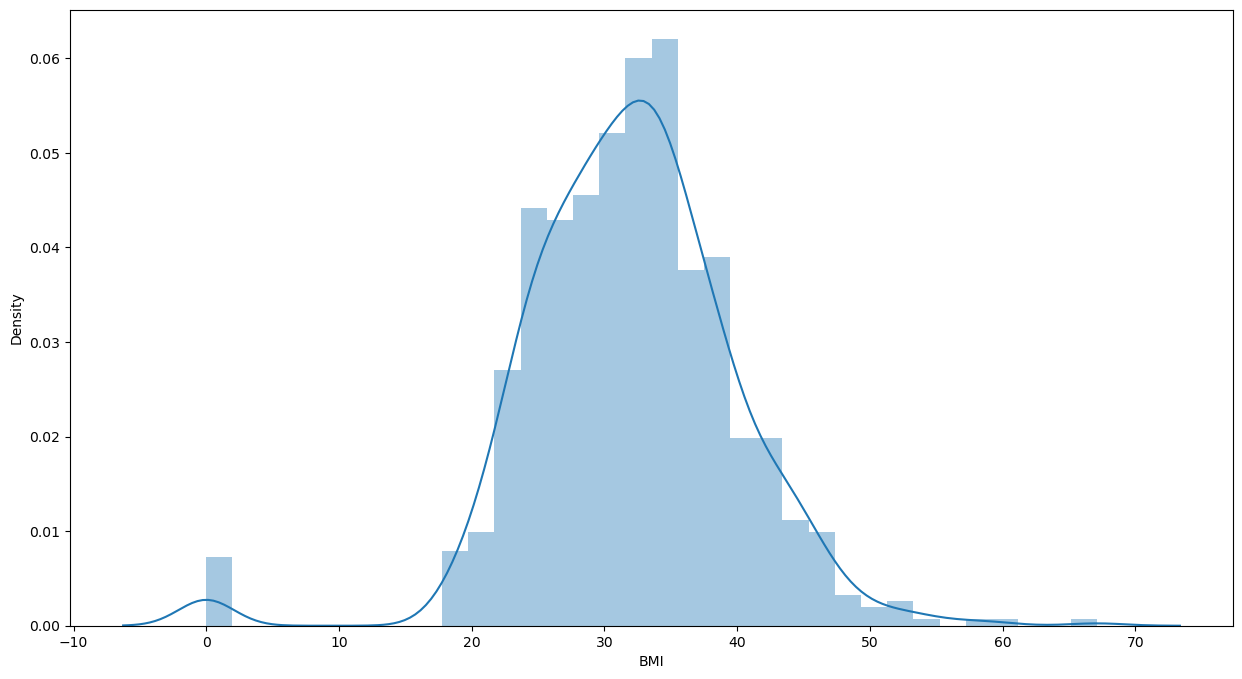

In [62]:
sns.distplot(X['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

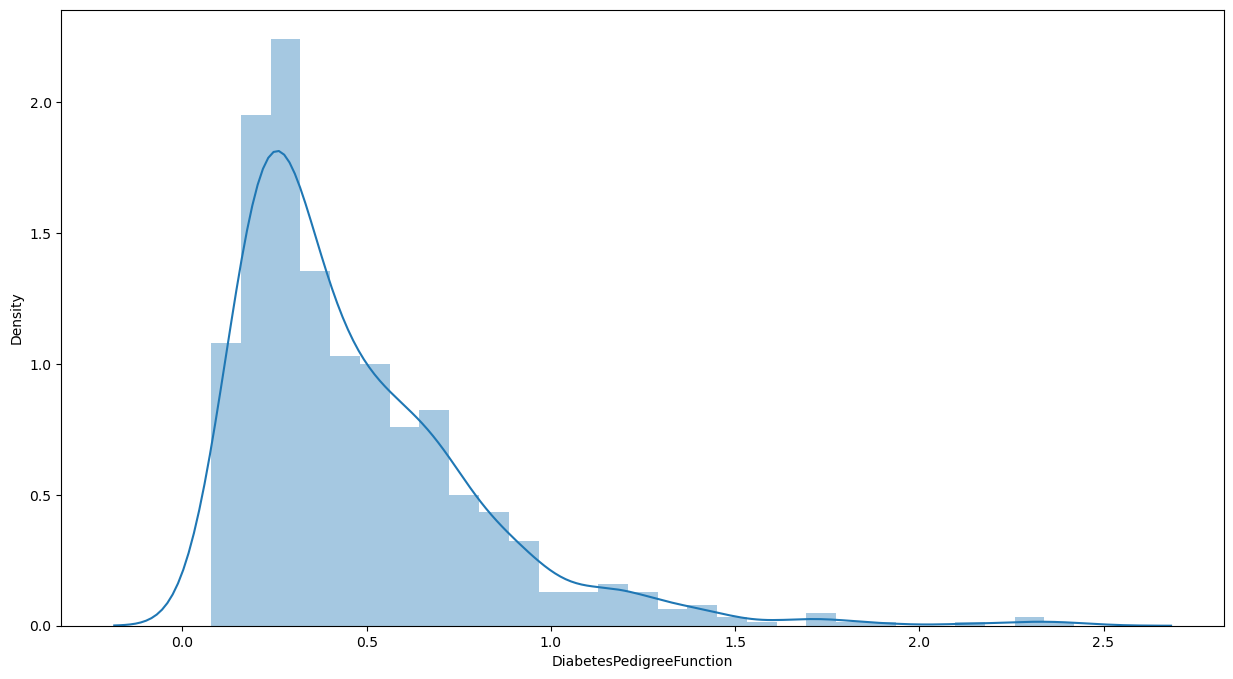

In [63]:
sns.distplot(X['DiabetesPedigreeFunction'])

<Axes: xlabel='Age', ylabel='Density'>

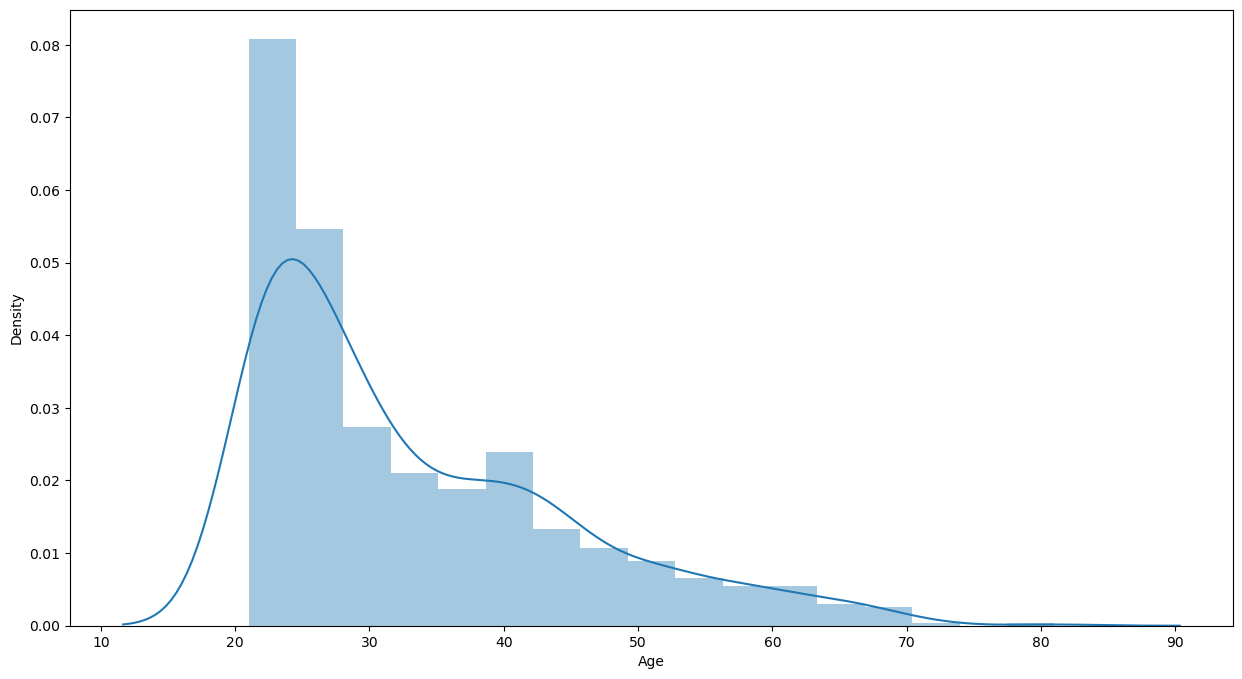

In [64]:
sns.distplot(X['Age'])

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

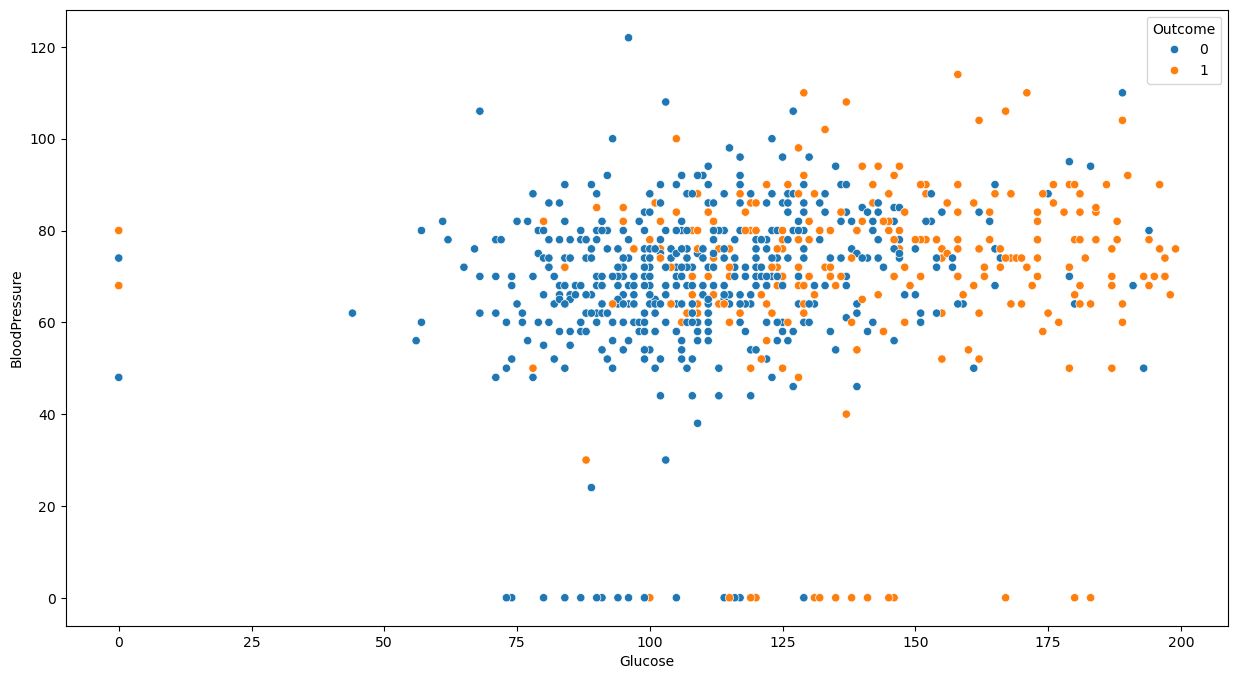

In [65]:
sns.scatterplot(data=data, x="Glucose", y="BloodPressure", hue="Outcome")

<Axes: xlabel='Age', ylabel='Pregnancies'>

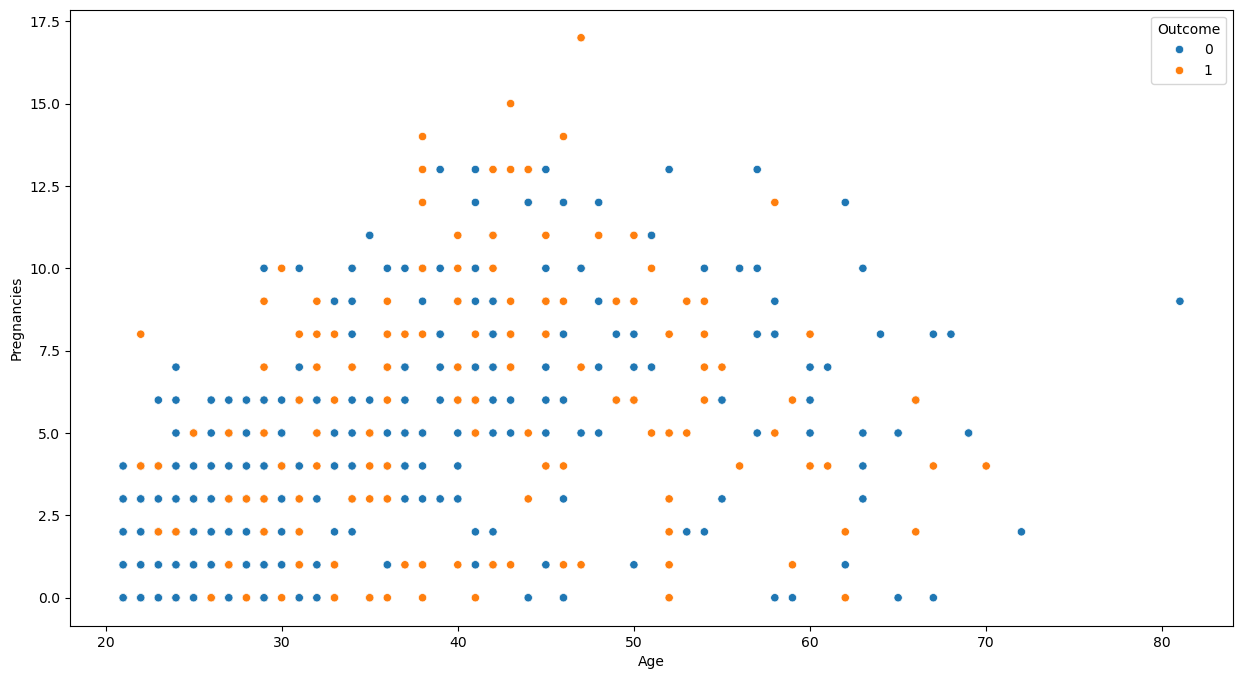

In [66]:
sns.scatterplot(data=data, x="Age", y="Pregnancies", hue="Outcome")

<Axes: xlabel='Glucose', ylabel='Insulin'>

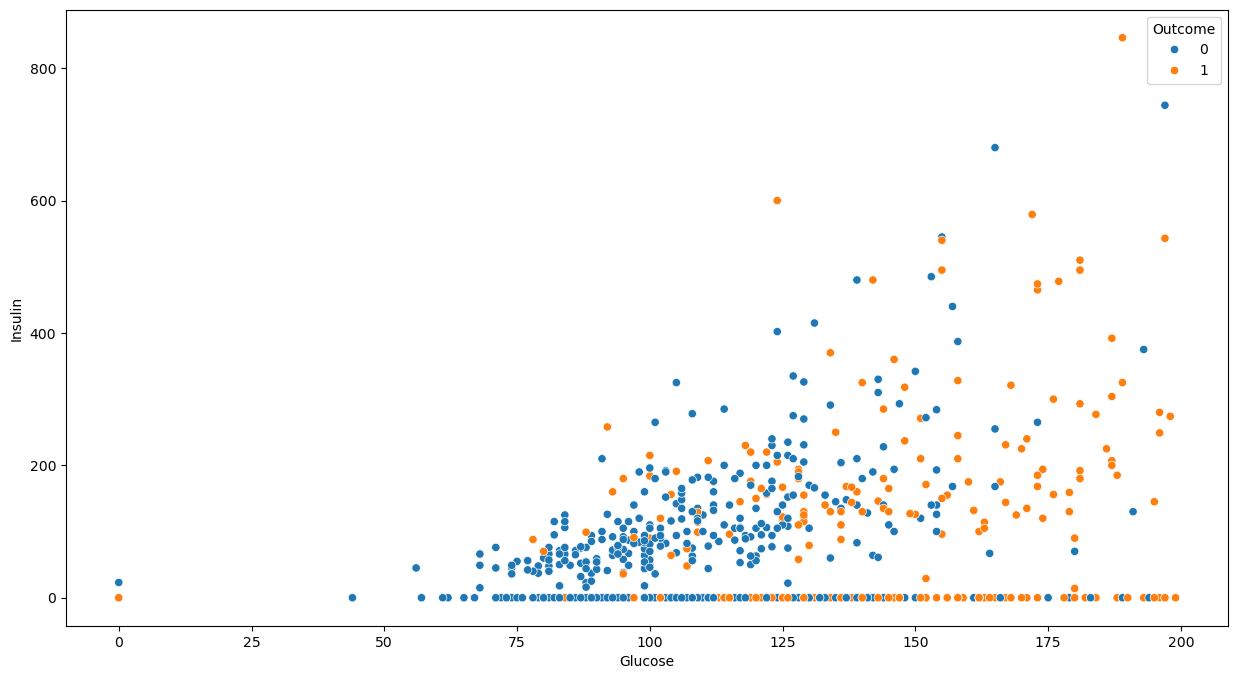

In [67]:
sns.scatterplot(data=data, x="Glucose", y="Insulin", hue="Outcome")

<Axes: xlabel='BMI', ylabel='Glucose'>

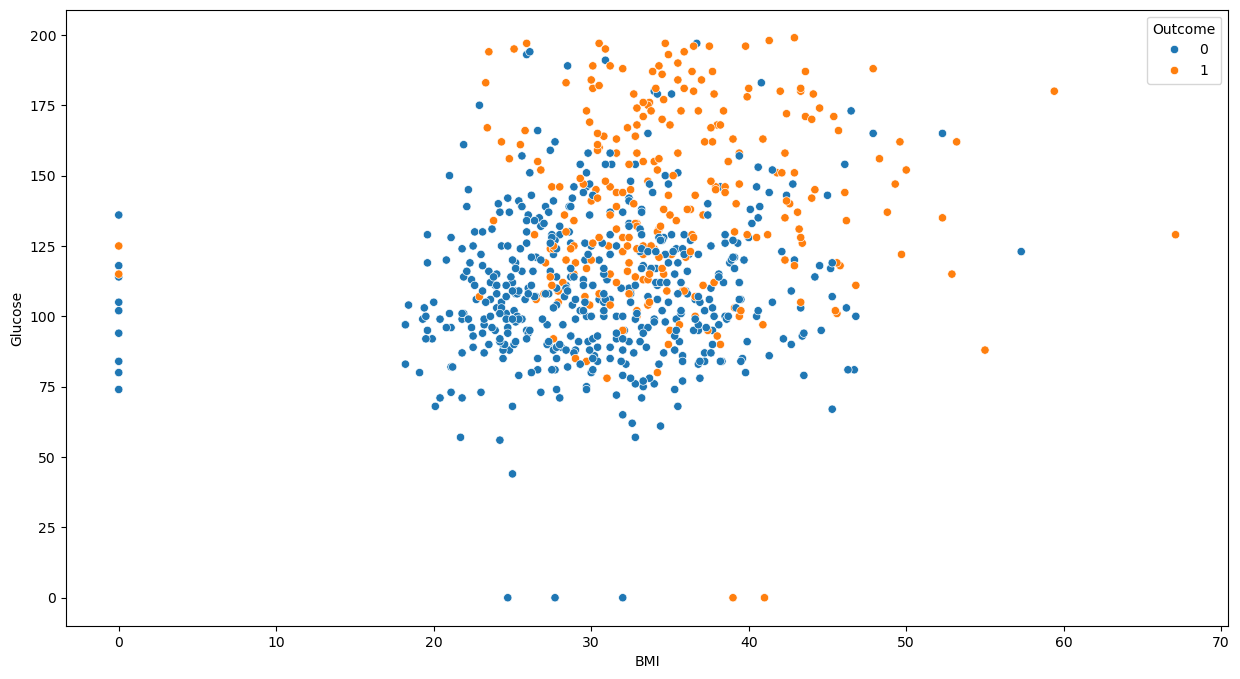

In [68]:
sns.scatterplot(data=data, x="BMI", y="Glucose", hue="Outcome")

<Axes: xlabel='BMI', ylabel='SkinThickness'>

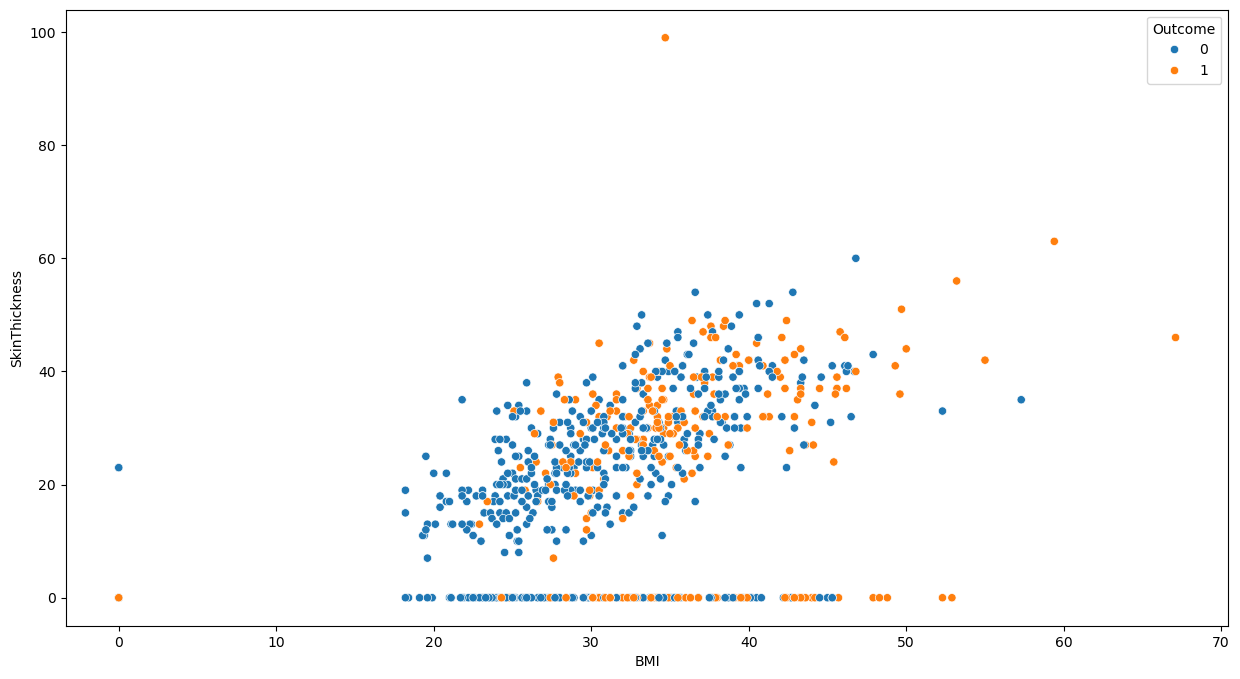

In [69]:
sns.scatterplot(data=data, x="BMI", y="SkinThickness", hue="Outcome")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Insulin'>

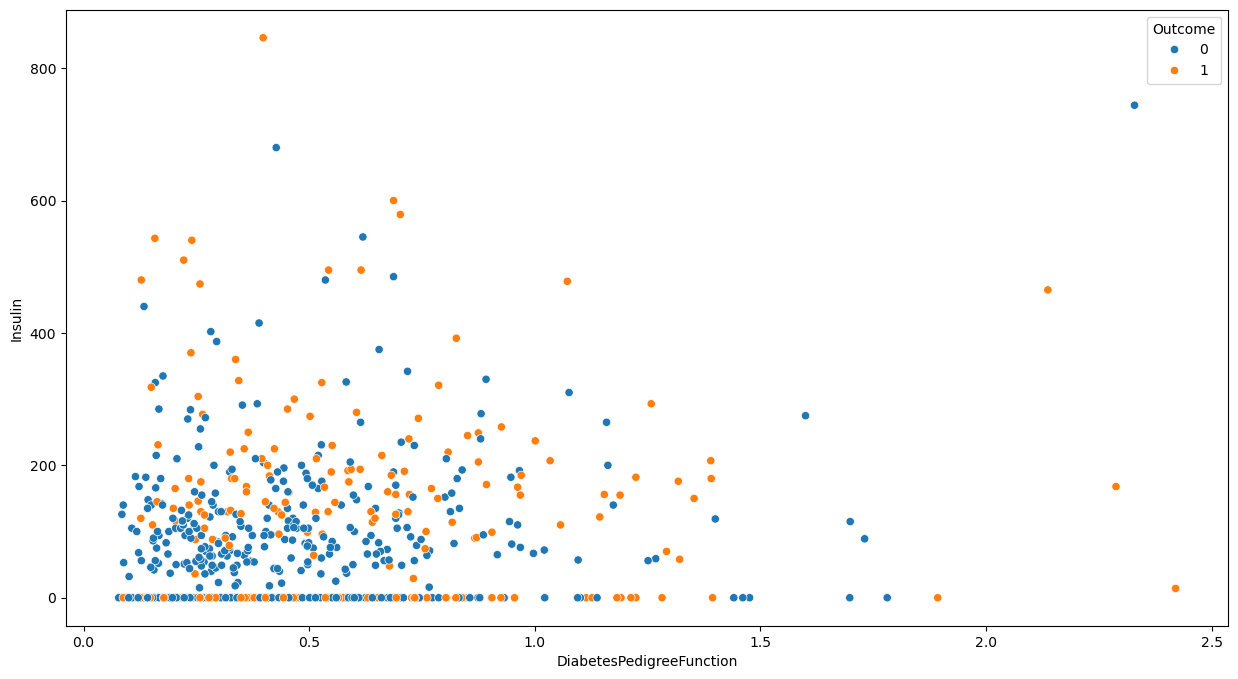

In [70]:
sns.scatterplot(data=data, x="DiabetesPedigreeFunction", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

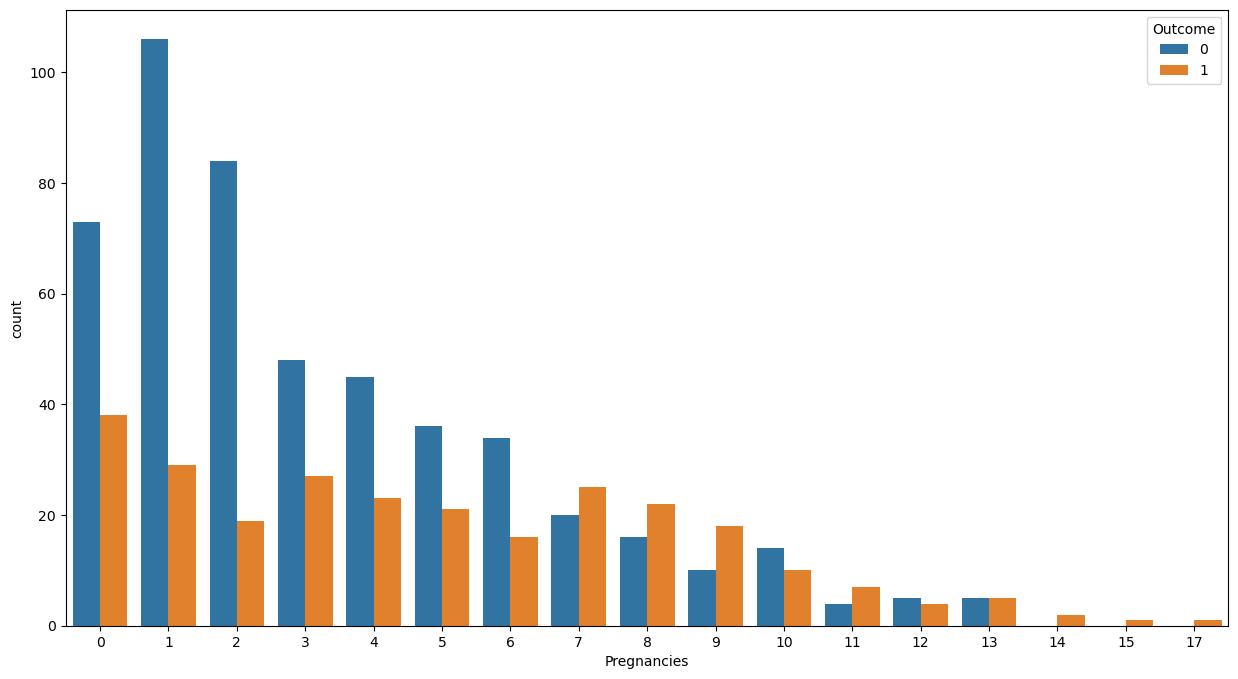

In [71]:
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = data)

<Axes: xlabel='Glucose', ylabel='count'>

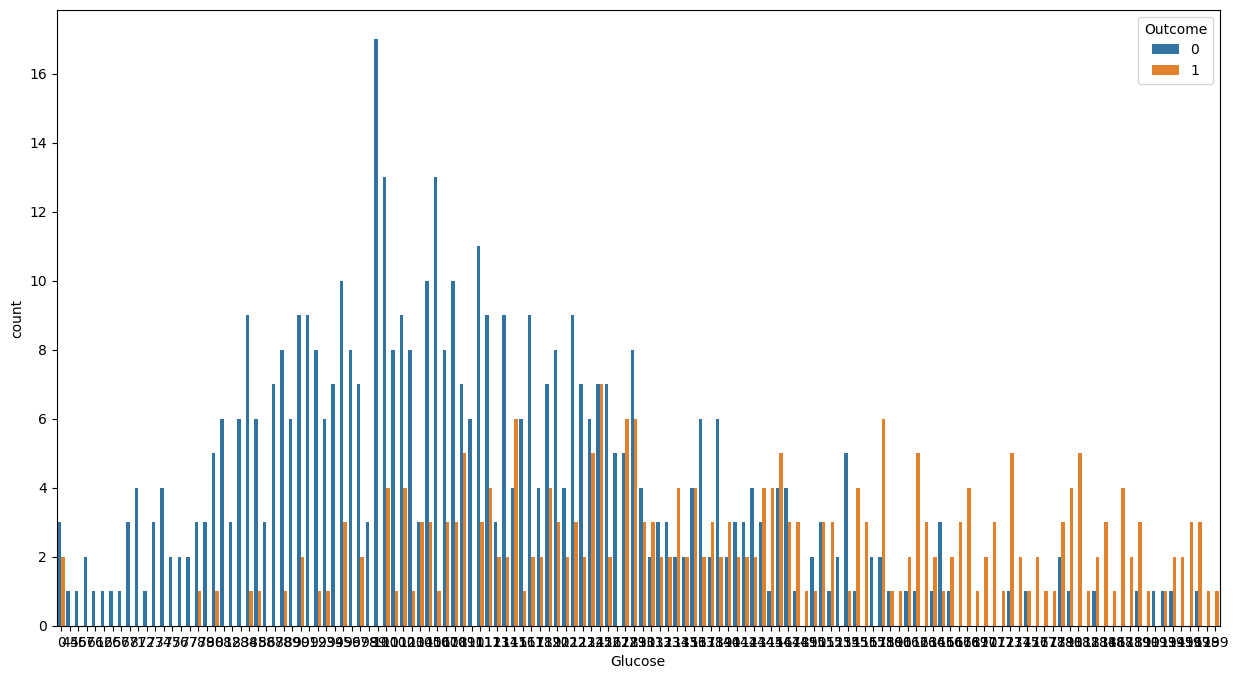

In [72]:
sns.countplot(x = 'Glucose', hue = 'Outcome', data = data)

<Axes: xlabel='BloodPressure', ylabel='count'>

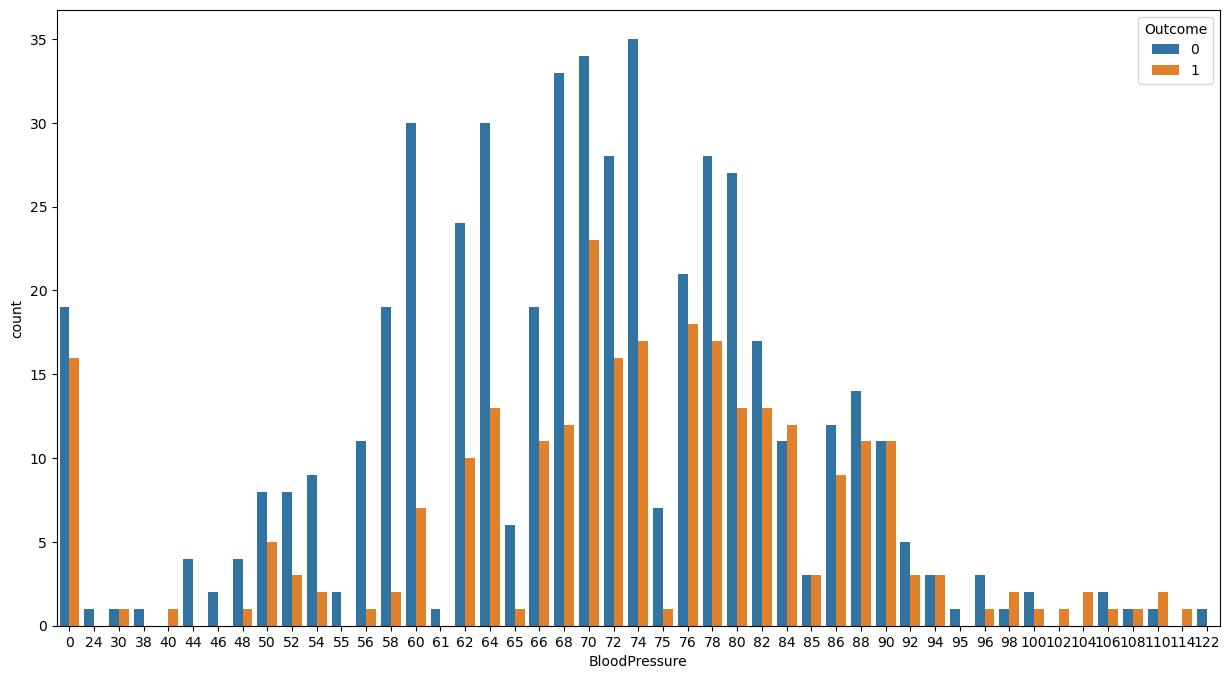

In [73]:
sns.countplot(x = 'BloodPressure', hue = 'Outcome', data = data)

<Axes: xlabel='SkinThickness', ylabel='count'>

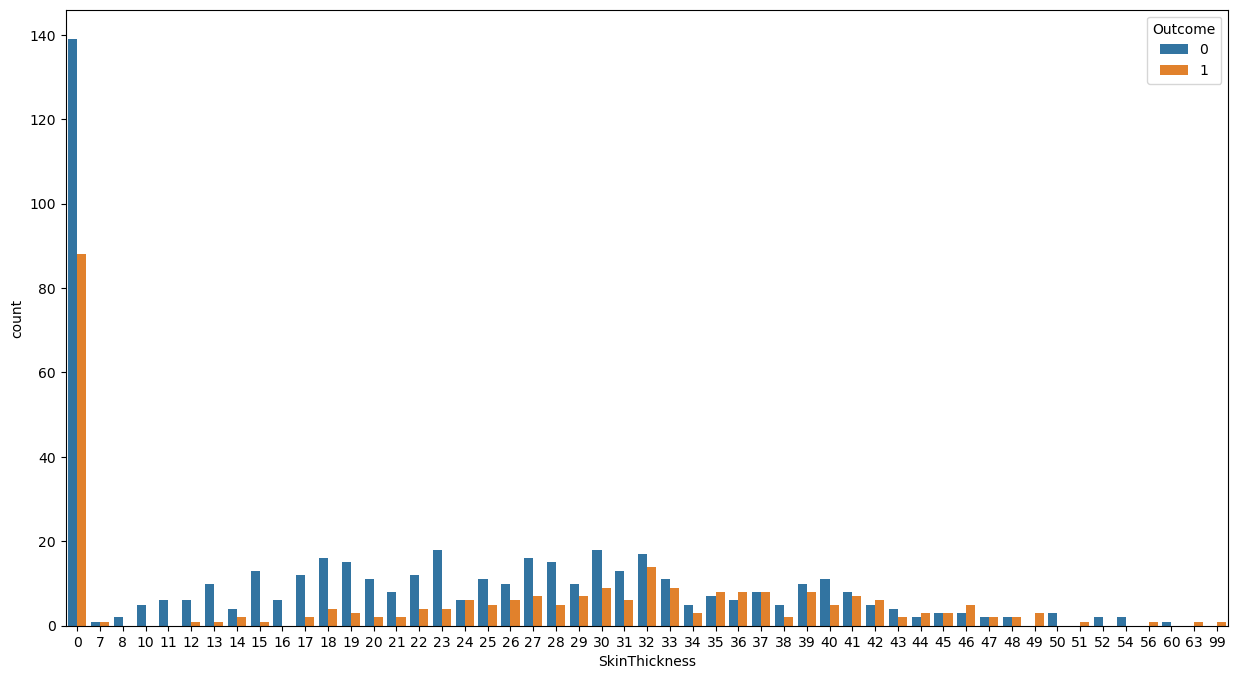

In [74]:
sns.countplot(x = 'SkinThickness', hue = 'Outcome', data = data)

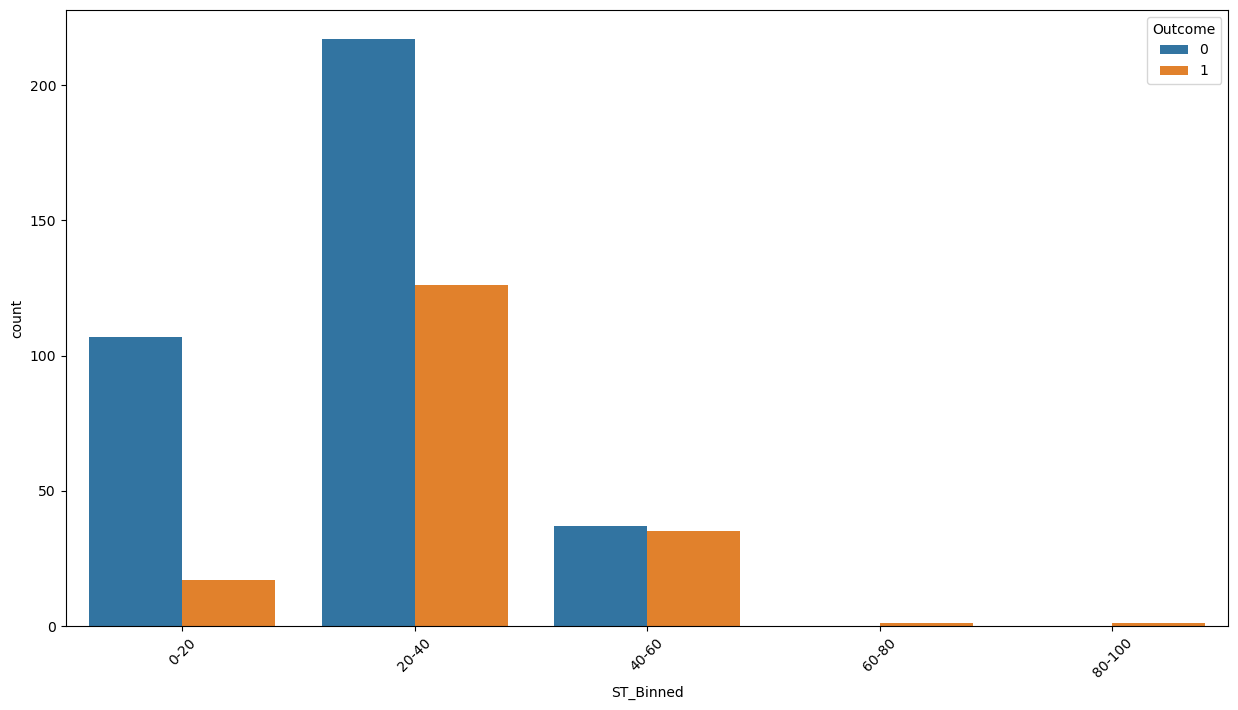

In [75]:
data['ST_Binned'] = pd.cut(data['SkinThickness'], bins=[0,20,40,60,80,100], labels=['0-20','20-40','40-60','60-80','80-100'])

# Tạo biểu đồ mới với các giá trị đã được nhóm
sns.countplot(x='ST_Binned', hue='Outcome', data=data)
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

<Axes: xlabel='Insulin', ylabel='count'>

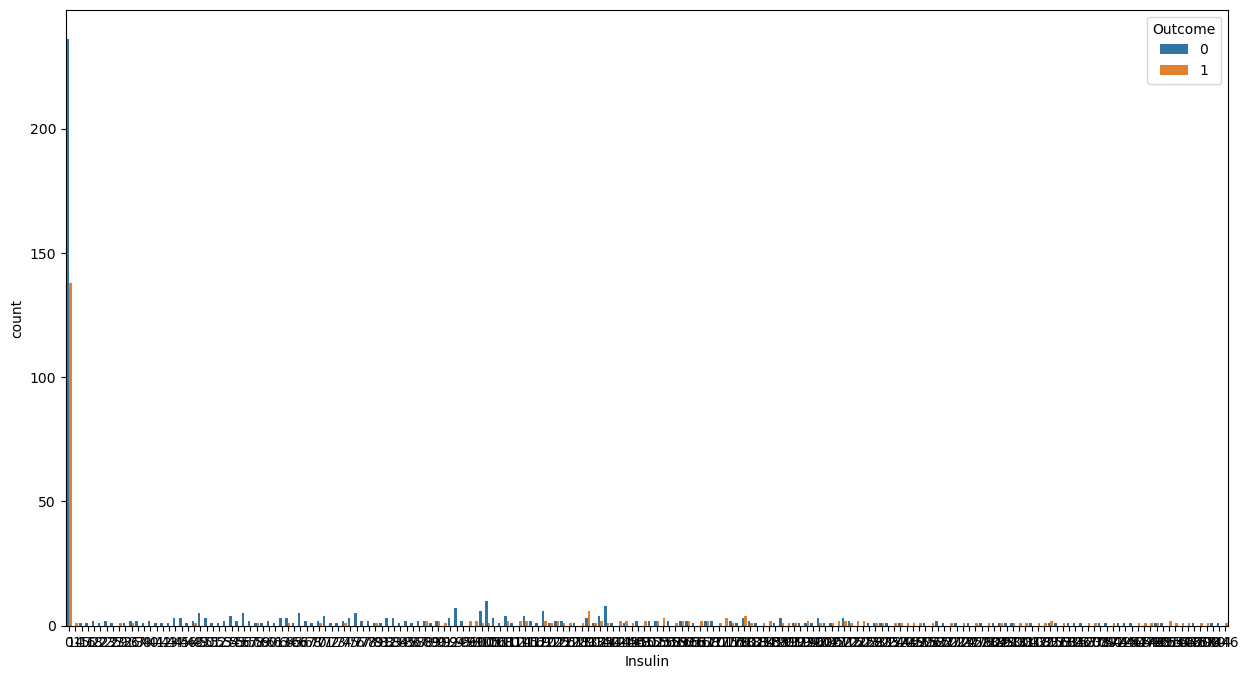

In [76]:
sns.countplot(x = 'Insulin', hue = 'Outcome', data = data)

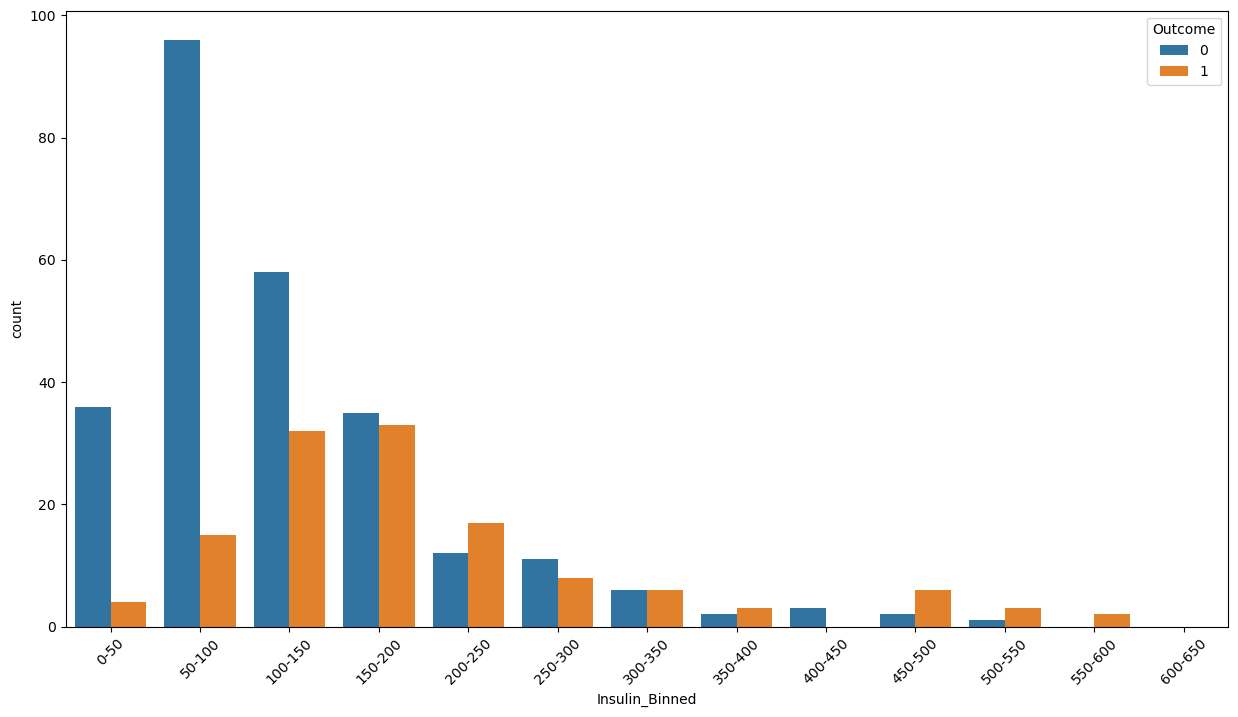

In [77]:
# Nhóm Insulin thành các khoảng
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '550-600', '600-650']
data['Insulin_Binned'] = pd.cut(data['Insulin'], bins=bins, labels=labels)

# Tạo biểu đồ mới với các giá trị đã được nhóm
sns.countplot(x='Insulin_Binned', hue='Outcome', data=data)
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.show()


<Axes: xlabel='BMI', ylabel='count'>

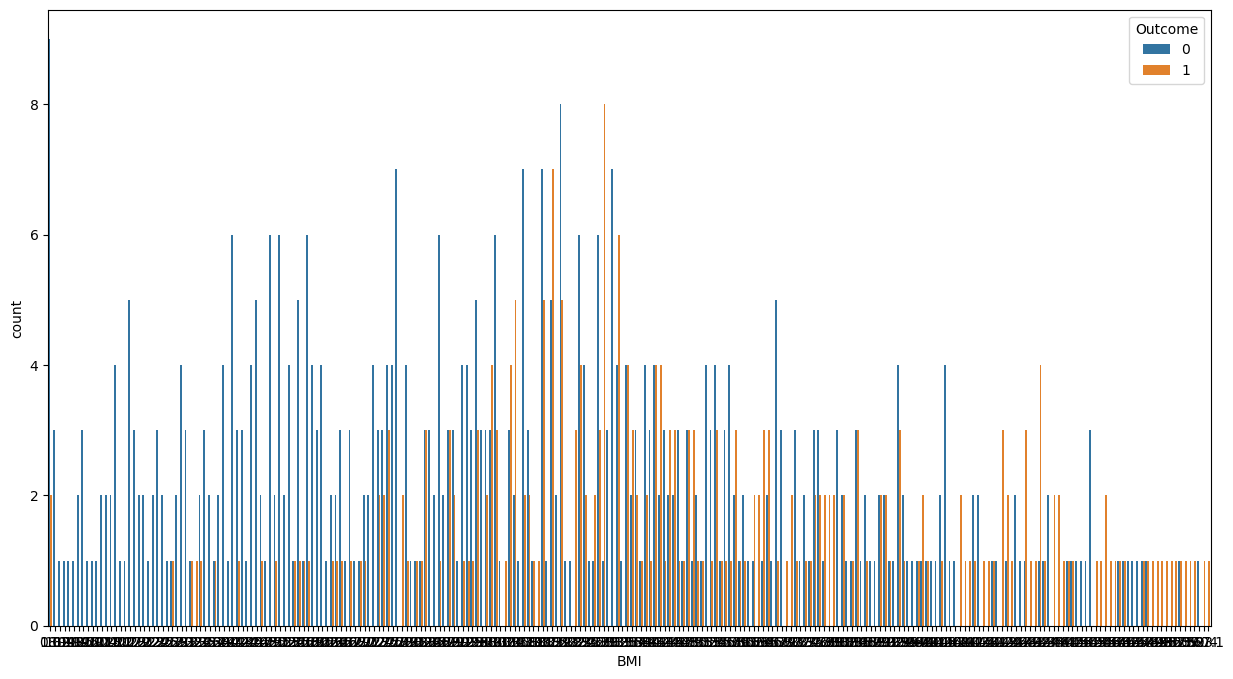

In [78]:
sns.countplot(x = 'BMI', hue = 'Outcome', data = data)

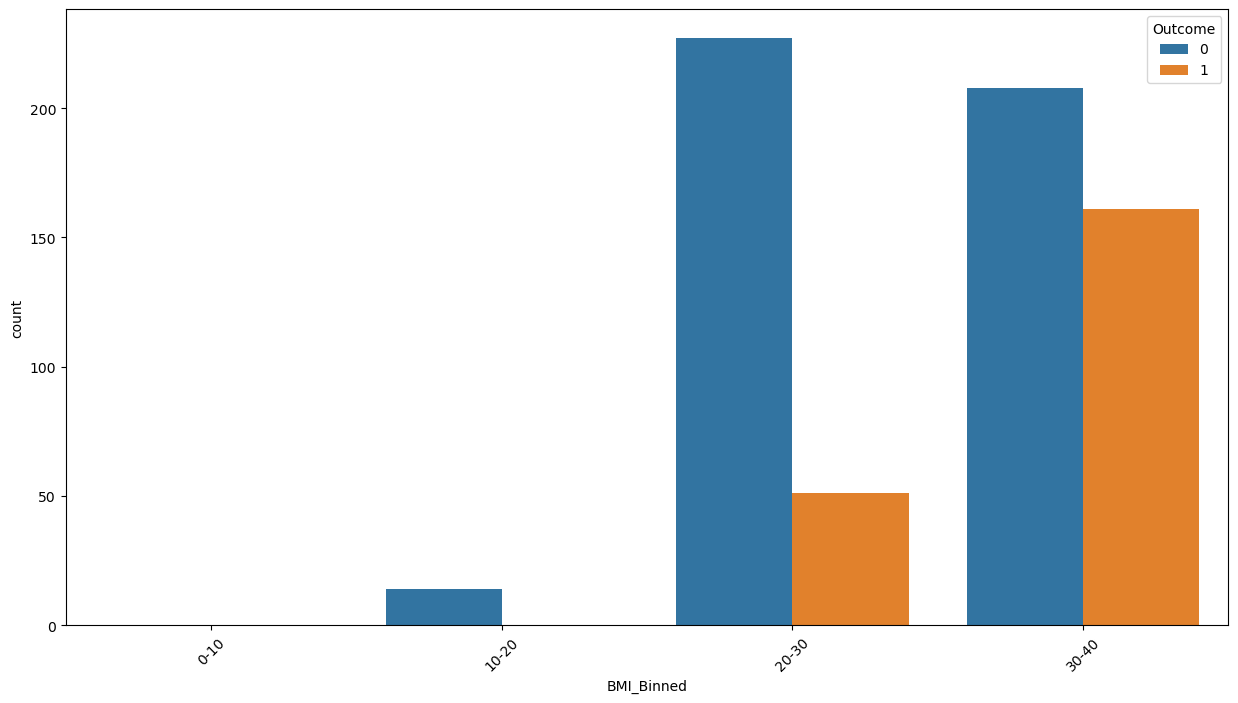

In [79]:
data['BMI_Binned'] = pd.cut(data['BMI'], bins=[0,10,20,30,40], labels=['0-10','10-20','20-30','30-40'])

# Tạo biểu đồ mới với các giá trị đã được nhóm
sns.countplot(x='BMI_Binned', hue='Outcome', data=data)
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='count'>

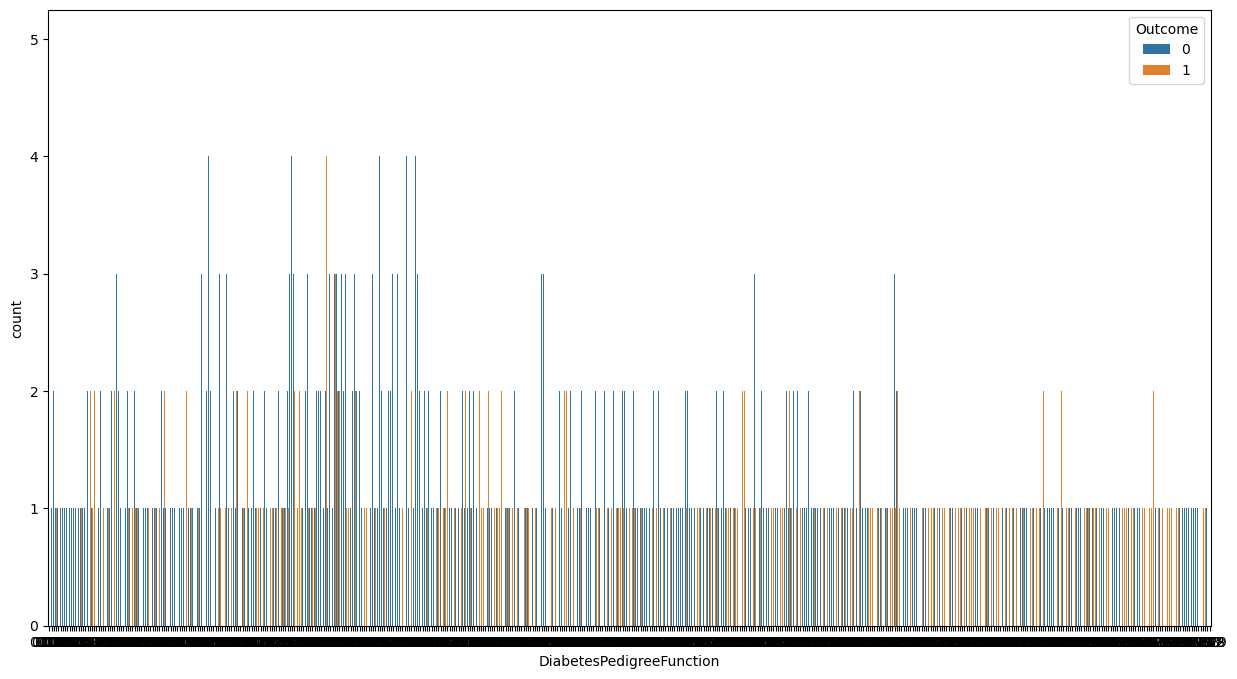

In [80]:
sns.countplot(x = 'DiabetesPedigreeFunction', hue = 'Outcome', data = data)

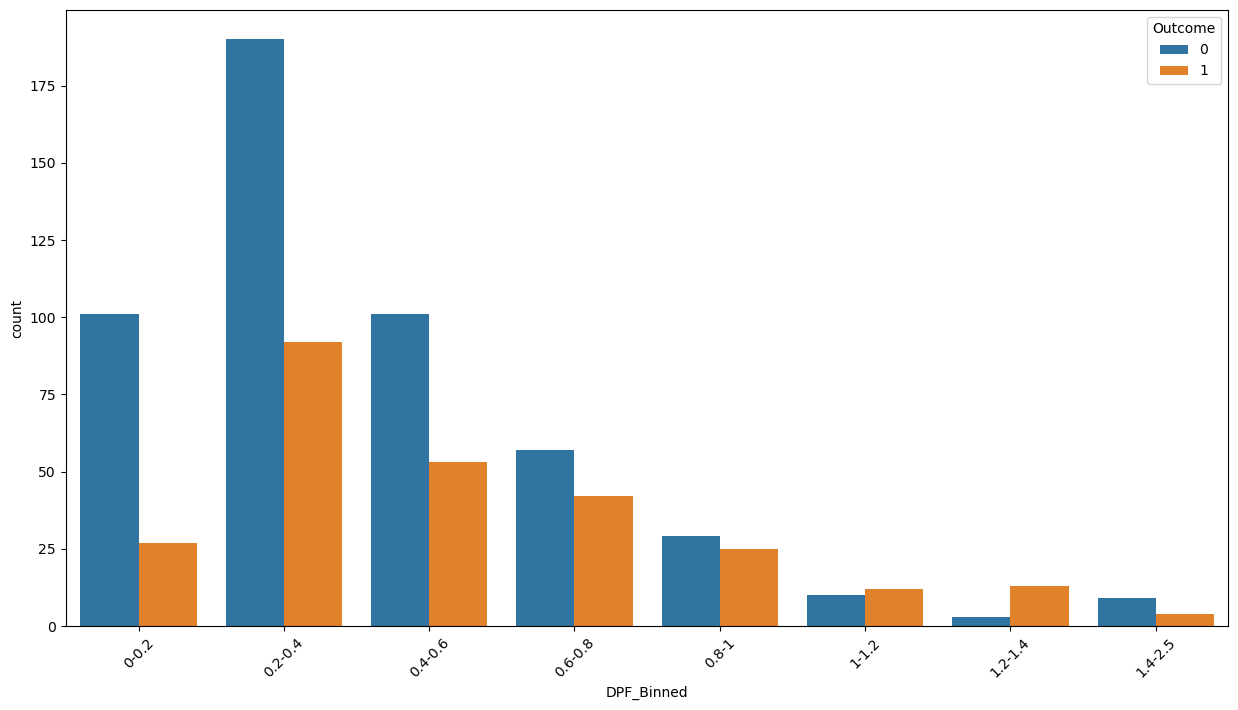

In [81]:
data['DPF_Binned'] = pd.cut(data['DiabetesPedigreeFunction'], bins=[0,0.2,0.4,0.6,0.8,1,1.2,1.4,2.5], labels=['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1','1-1.2','1.2-1.4','1.4-2.5'])

# Tạo biểu đồ mới với các giá trị đã được nhóm
sns.countplot(x='DPF_Binned', hue='Outcome', data=data)
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

<Axes: xlabel='Age', ylabel='count'>

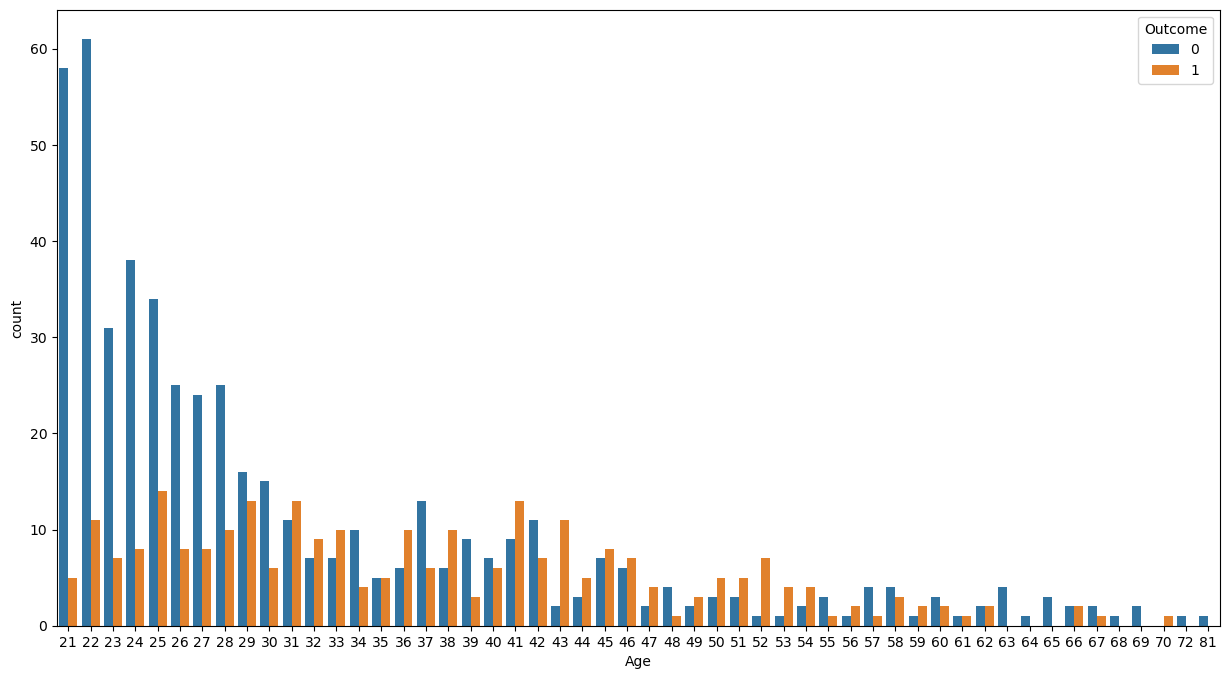

In [82]:
sns.countplot(x = 'Age', hue = 'Outcome', data = data)

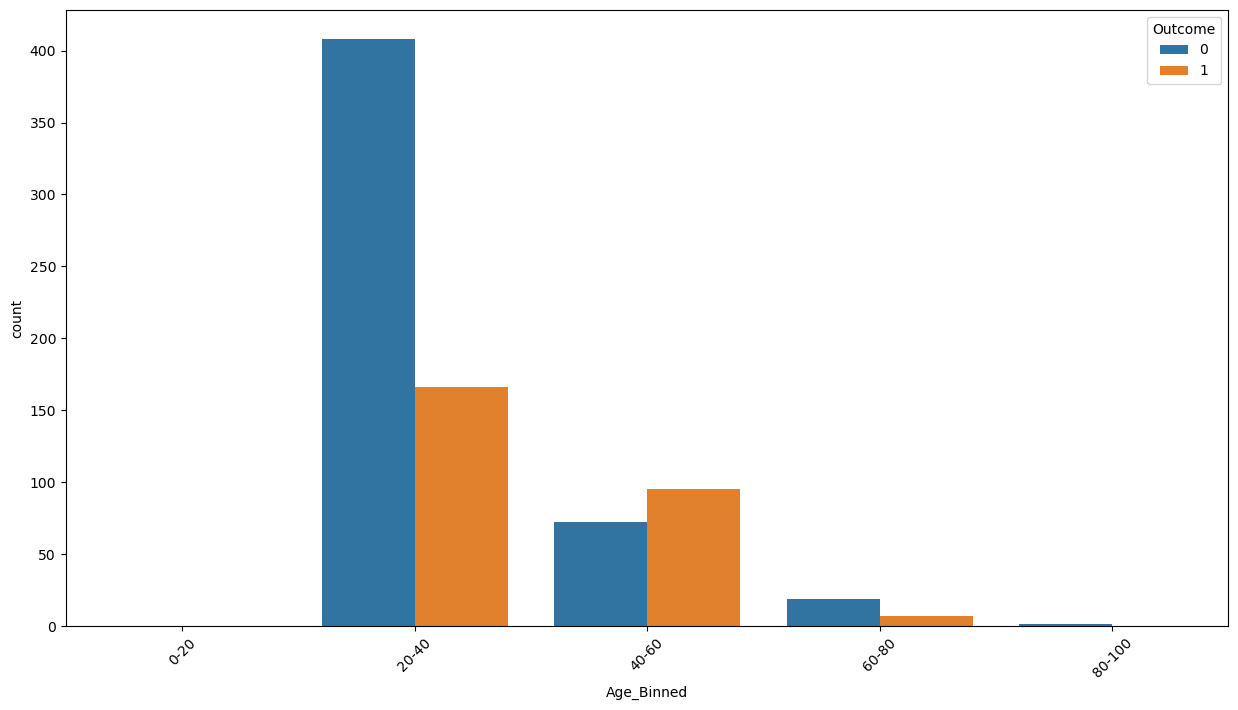

In [83]:
data['Age_Binned'] = pd.cut(data['Age'], bins=[0,20,40,60,80,100], labels=['0-20','20-40','40-60','60-80','80-100'])

# Tạo biểu đồ mới với các giá trị đã được nhóm
sns.countplot(x='Age_Binned', hue='Outcome', data=data)
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

In [84]:
pd.DataFrame(X_resampled_train).to_csv('X_train.csv', index=False)
pd.DataFrame(X_resampled_test).to_csv('X_test.csv', index=False)


pd.DataFrame(y_resampled_train).to_csv('y_train.csv', index=False, header=True)
pd.DataFrame(y_resampled_test).to_csv('y_test.csv', index=False, header=True)